Md. Tanvir Jawad<br>ID: 21101221

In [30]:
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

# import units
from pint import UnitRegistry
units = UnitRegistry()

In [31]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [32]:
from modsim import *

In [33]:
init = State(y=381, v=0)

In [34]:
system = System(init=init,
                g=9.8,
                t_end=10)

In [35]:
def slope_func(t, state, system):
    y, v = state

    dydt = v
    dvdt = -system.g

    return dydt, dvdt

In [36]:
dydt, dvdt = slope_func(0, system.init, system)
dydt, dvdt

(0, -9.8)

In [37]:
results, details = run_solve_ivp(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

In [38]:
results.head()

,y,v
0.0,381.000,0.00
0.1,380.951,-0.98
0.2,380.804,-1.96
0.3,380.559,-2.94
0.4,380.216,-3.92


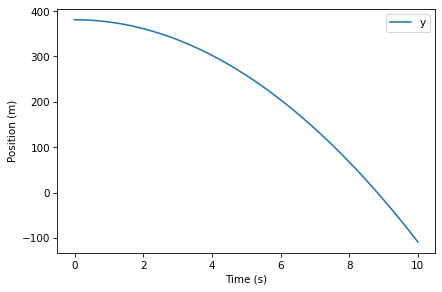

In [39]:
results.y.plot()

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

In [40]:
results.iloc[-1].y

-108.99999999999983

In [41]:
t_crossings = crossings(results.y, 0)
t_crossings

array([8.81788535])

In [42]:
def event_func(t, state, system):
    y, v = state
    return y

In [43]:
results, details = run_solve_ivp(system, slope_func,
                                 events=event_func)
details.message

'A termination event occurred.'

In [44]:
t_end = results.index[-1]
t_end

8.817885349720553

In [45]:
y, v = results.iloc[-1]
y, v

(0.0, -86.41527642726145)

**MODIFICATION**

Imagine a spaceship is on a trajectory that will take it too close to a supermassive black hole. If it gets too close, it will be pulled in by the black hole's gravity. Your task is to determine how long it will take for the spaceship to escape from the black hole's gravitational pull.

In [58]:
# Define initial conditions and constants
r_initial = 1e9
v_initial = 1e5

init_spaceship = State(r=r_initial, v=v_initial)

In [59]:
# Assume the mass of the black hole is 1e35 kg
mass_black_hole = 1e35

In [60]:
# Define the system
system_spaceship = System(init=init_spaceship,
                          G=6.674e-11,
                          m1=mass_black_hole,
                          m2=1e3,
                          r_final=1e12,
                          t_end=1e8)

In [61]:
# Define the universal gravitation function
def universal_gravitation_spaceship(state, system):
    r, v = state
    G, m1, m2 = system.G, system.m1, system.m2

    force = G * m1 * m2 / r**2
    return force

In [62]:
# Define the slope function
def slope_func_spaceship(t, state, system):
    r, v = state
    m2 = system.m2

    force = universal_gravitation_spaceship(state, system)
    drdt = v
    dvdt = -force / m2

    return drdt, dvdt

In [63]:
# Define the event function
def event_func_spaceship(t, state, system):
    r, v = state
    return r - system.r_final

In [64]:
# Run the simulation
results_spaceship, details_spaceship = run_solve_ivp(system_spaceship, slope_func_spaceship,
                                                     events=event_func_spaceship)

In [65]:
#Extract the time of escape
t_event_spaceship = results_spaceship.index[-1]

In [66]:
# Convert time to days
seconds_spaceship = t_event_spaceship * units.second
days_spaceship = seconds_spaceship.to(units.day)

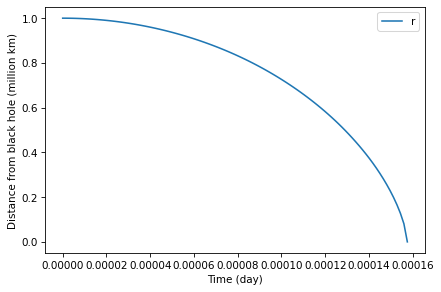

In [67]:
# Plot the results
results_spaceship.index /= (60 * 60 * 24)
results_spaceship.r /= 1e9

results_spaceship.r.plot(label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from black hole (million km)')